In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
try:
    import theano
except:
    !pip install Theano
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Importing the dataset
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# some columns have text data so let's one hot encode them
#  for more on one hot encoding click this link below
# https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [9]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [11]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
churn_data_encoded = Gender_dummies

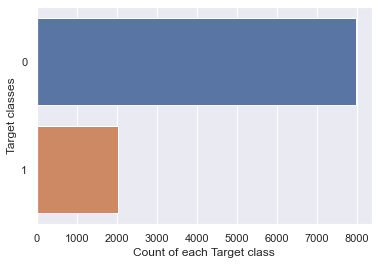

In [13]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

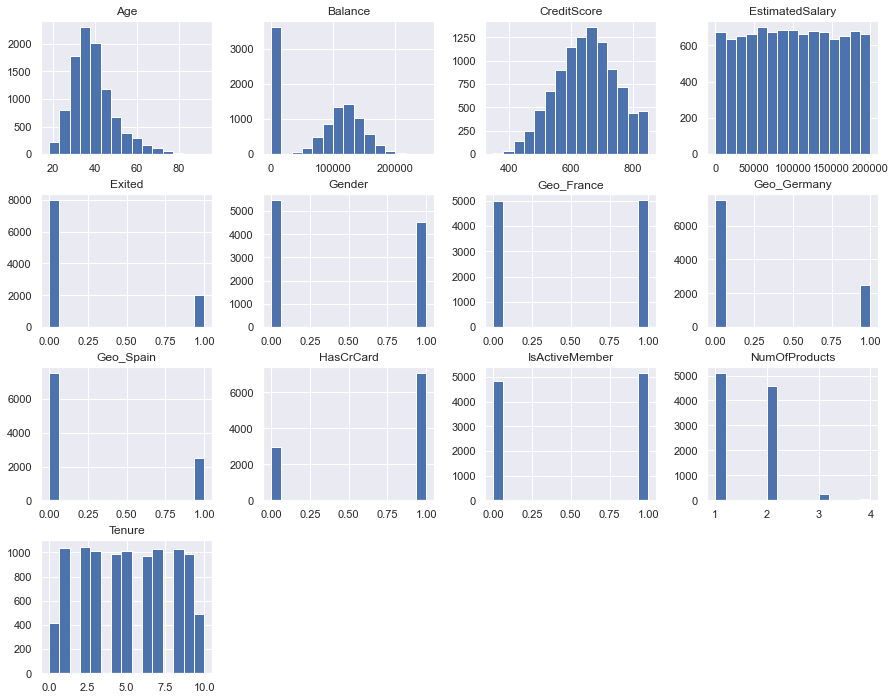

In [14]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

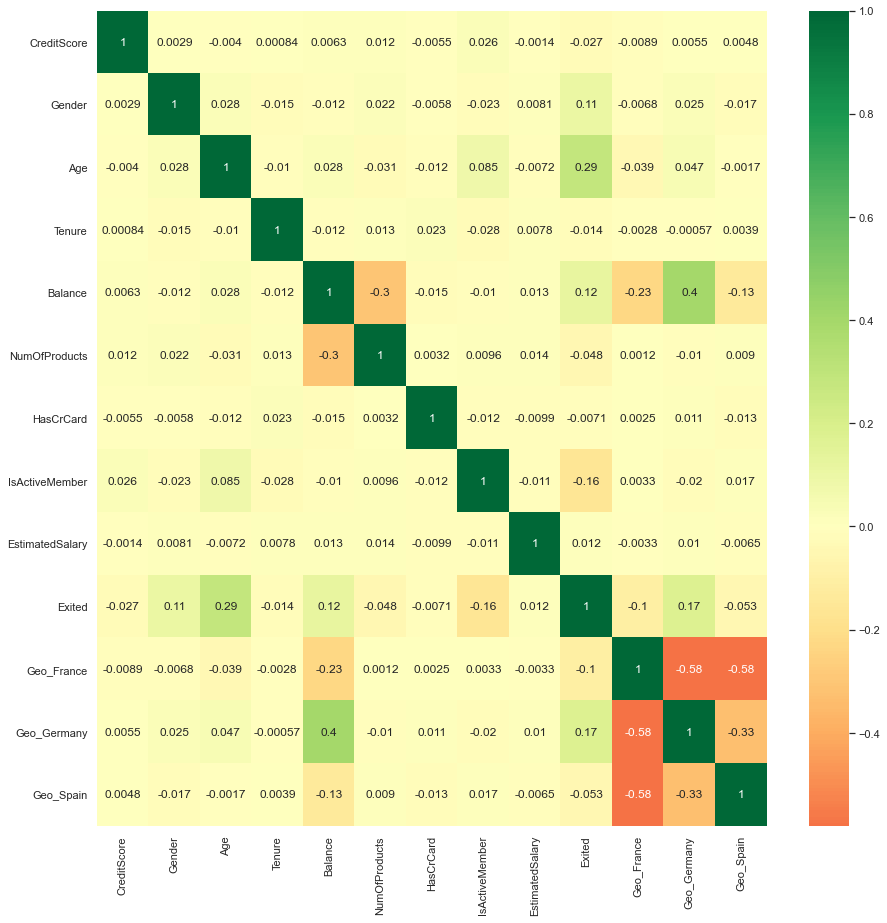

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

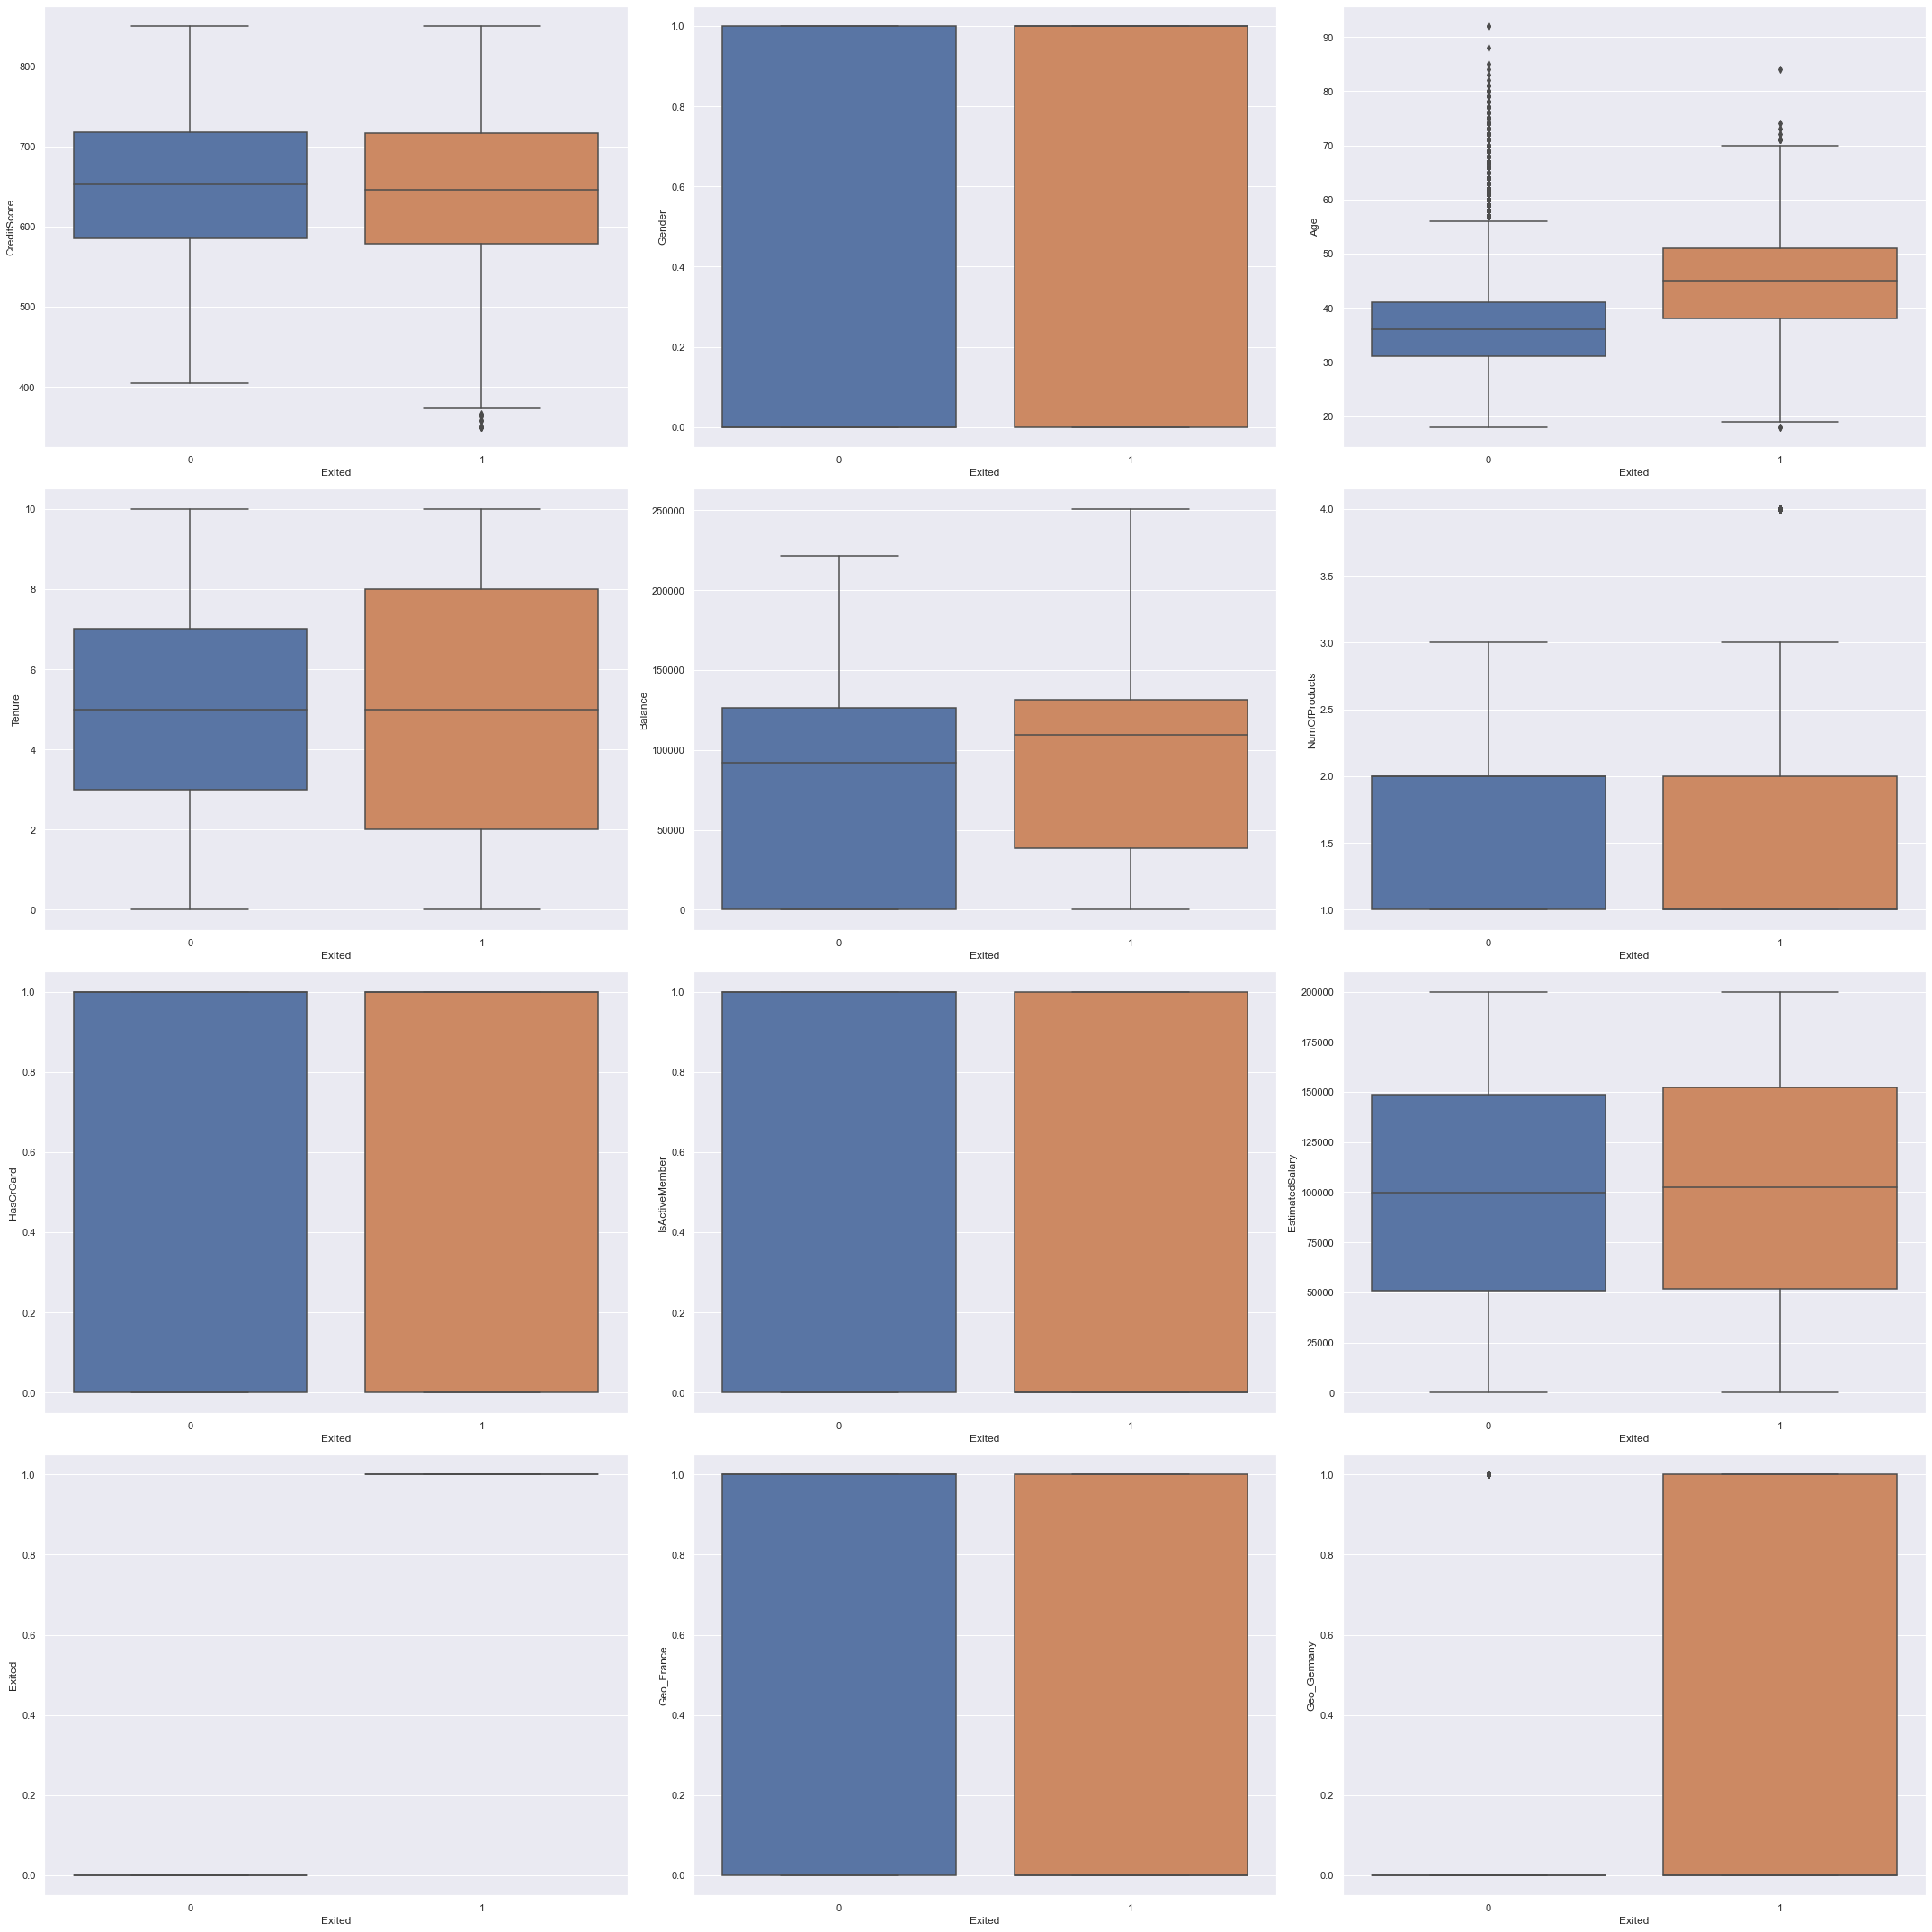

In [16]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [17]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [18]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [20]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [22]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [23]:

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test),epochs = 100,verbose = 0)



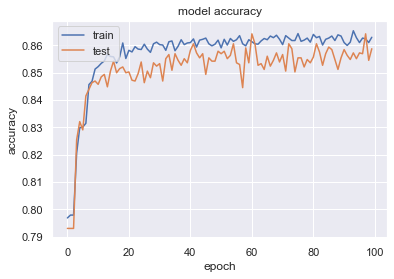

In [24]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# Model Testing

In [25]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test, batch_size=64, verbose=1)
y_pred =(y_pred>0.5)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

52/52 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2617
           1       0.00      0.00      0.00       683

    accuracy                           0.79      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.63      0.79      0.70      3300



c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


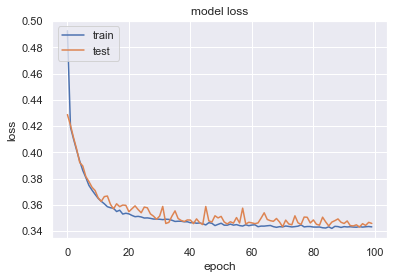

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
#for layer in classifier.layers: print(layer.get_config(), layer.get_weights())


<a id='11'></a>
# 11. Evaluation Metrics

In [29]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

NameError: name 'cm' is not defined

In [30]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2617
           1       0.78      0.44      0.56       683

    accuracy                           0.86      3300
   macro avg       0.83      0.70      0.74      3300
weighted avg       0.85      0.86      0.84      3300



Instructions for updating:
Please use `model.predict()` instead.


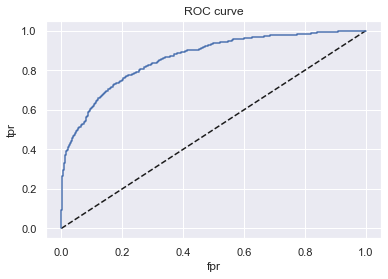

In [31]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [32]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8616898967277252

<a id='12'></a>
# 12. Evaluation of Multiple Training Instances

In [33]:
# Part 4 - Evaluating, Improving and Tuning the ANN

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100,verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

In [34]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8401492595672607
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.017564446315400037


#### Deviation is very low so I'd say that it is unlikely to be an overfitted model. With different training sets it got the mean with all training results is still very close to the above model.

<a id='13'></a>
# 13. Improving ANN with Dropout layer

#### Dropout Regularization is used to reduce overfitting if needed.

#### p is the fraction of input units to drop. If suppose there are ten neurons from a layer and p is 0.1 then one of the neurons would be disabled and its output would not be sent to the further layer.
#### It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.


In [35]:
# Improving the ANN
from keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8346
Train score: 0.40452447533607483
Train accuracy: 0.8346268534660339
********************
330/330 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8385
Test score: 0.4103146493434906
Test accuracy: 0.8384848237037659


Text(0.5, 12.5, 'Predicted label')

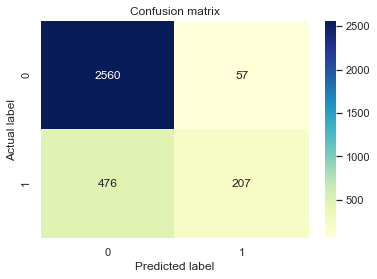

In [36]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2617
           1       0.78      0.30      0.44       683

    accuracy                           0.84      3300
   macro avg       0.81      0.64      0.67      3300
weighted avg       0.83      0.84      0.81      3300



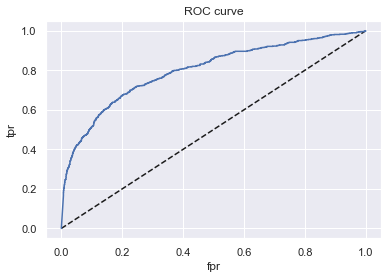

In [38]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [39]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7988934833678432

<a id='14'></a>
# 14. Tuning the ANN

#### Let's test 2 values of the batch size and we're gonna try 25 and 32. So why 25 and 32? Well, that's based on my experience and that's also common practice to take powers of 2. Well, you can try other values of the batch size as well.

In [40]:

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = build_classifier('adam')
#parameters = {'batch_size': [25, 32],
 #             'epochs': [100, 200],
  #            'optimizer': ['adam', 'rmsprop']}
history=classifier.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size = 25, epochs = 100,verbose = 0)

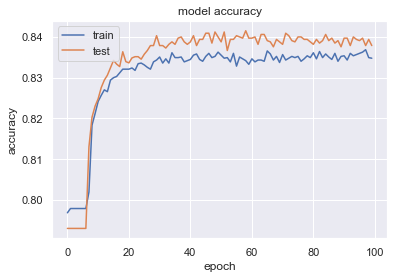

In [41]:

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [42]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8366
Train score: 0.3915192782878876
Train accuracy: 0.8365671634674072
********************
330/330 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8379
Test score: 0.3982652723789215
Test accuracy: 0.8378787636756897


Text(0.5, 12.5, 'Predicted label')

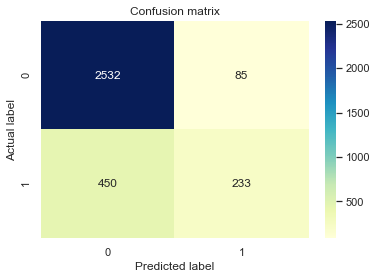

In [43]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
def build_classifier1(optimizer):
    classifier1 = Sequential()
    classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier1
classifier1 = build_classifier1('rmsprop')

In [45]:
history=classifier1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 200,verbose = 0)

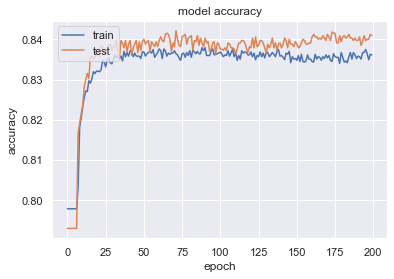

In [46]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [47]:
score, acc = classifier1.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier1.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8372
Train score: 0.3922221064567566
Train accuracy: 0.8371641635894775
********************
330/330 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8409
Test score: 0.40037256479263306
Test accuracy: 0.8409090638160706


Text(0.5, 12.5, 'Predicted label')

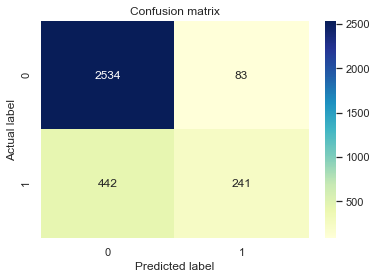

In [48]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Big Thanks to
* https://www.techopedia.com/definition/5967/artificial-neural-network-ann
* https://www.digitaltrends.com/cool-tech/what-is-an-artificial-neural-network/
* https://www.analyticsvidhya.com/blog/2014/10/ann-work-simplified/
* https://www.analyticsvidhya.com/blog/2014/10/introduction-neural-network-simplified/
* https://medium.com/technology-invention-and-more/everything-you-need-to-know-about-artificial-neural-networks-57fac18245a1
* http://pages.cs.wisc.edu/~bolo/shipyard/neural/local.html
* https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f